# Problem 3 – Classification (40%)
This problem will build upon the previous one.  In this case, however, you will gain experience developing a classification model that can predict the class label of an unknown food item based on its nutritional descriptors.

In [38]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [39]:
#read in training data
train_features = pd.read_csv('x1.csv', header=None)
train_classes = pd.read_csv('c1.csv', header=None)

#read in validation set
val_features = pd.read_csv('x2.csv', header=None)
val_classes = pd.read_csv('c2.csv', header=None)

#read in test set, classes are not provided
test_features = pd.read_csv('x3.csv', header=None)


Text(0.5, 1.0, 'Correlation matrix for Train that has not gone through dimensionality reduction')

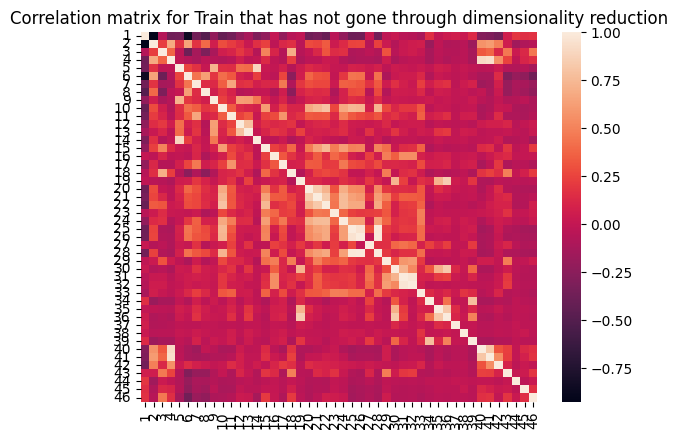

In [40]:
# print("CORRELATION MATRIX FOR DATA THAT HAS NOT GONE THROUGH DIM REDUCTION")
labels = [*range(1, 47, 1)]
corr = train_features.corr()
sns.heatmap(corr, 
            xticklabels=labels,
            yticklabels=labels)
plt.title("Correlation matrix for Train that has not gone through dimensionality reduction")

Text(0.5, 1.0, 'Covariance matrix for Train that has not gone through dimensionality reduction')

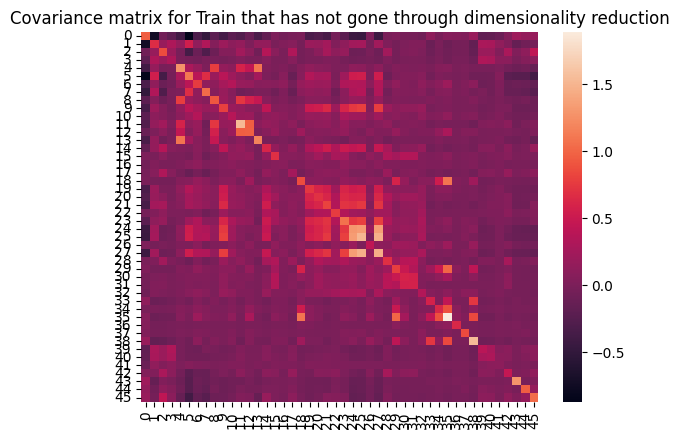

In [41]:
#covariance
cov = pd.DataFrame(train_features).cov()
sns.heatmap(cov, 
            xticklabels=cov.columns.values,
            yticklabels=cov.columns.values)

plt.title("Covariance matrix for Train that has not gone through dimensionality reduction")

#### 10% credit.  Use a 1-nearest neighbor (i.e., k=1) classifier to predict labels for the validation samples (x2.csv). 
Report classification performance by comparing ground truth labels (c2.csv) against predictions from the 1NN classifier.  Generate a confusion matrix and interpret the results. 

In [42]:
#imports
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

We use 9 components here because from p2, we found that 9 components capture 100% of the variance in the data
now our data has been transformed for use in knn!


Text(0.5, 1.0, 'Correlation Matrix of Projected Data')

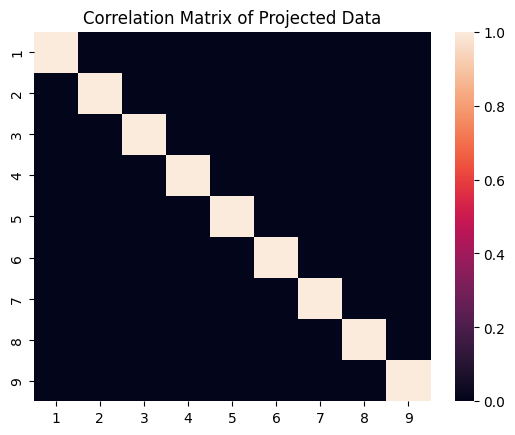

In [43]:
#perform LDA on training data
lda = LDA(n_components = 9)
print("We use 9 components here because from p2, we found that 9 components capture 100% of the variance in the data")
lda.fit(train_features, train_classes.values.ravel())
train_lda = lda.transform(train_features)

#perform LDA on validation data
val_lda = lda.transform(val_features)

#perform LDA on test data
test_lda = lda.transform(test_features)

print("now our data has been transformed for use in knn!")

#correlation matrix of transformed data
corr = pd.DataFrame(train_lda).corr()
labels = [*range(1, 10, 1)]
sns.heatmap(corr, 
            xticklabels=labels,
            yticklabels=labels)
plt.title("Correlation Matrix of Projected Data")


Text(0.5, 1.0, 'Covariance Matrix of Projected Data')

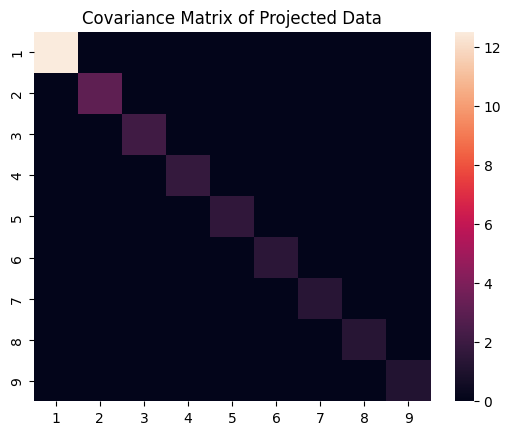

In [44]:
cov = pd.DataFrame(train_lda).cov()
sns.heatmap(cov, 
            xticklabels=labels,
            yticklabels=labels)
plt.title("Covariance Matrix of Projected Data")

Text(0, 0.5, 'LD2')

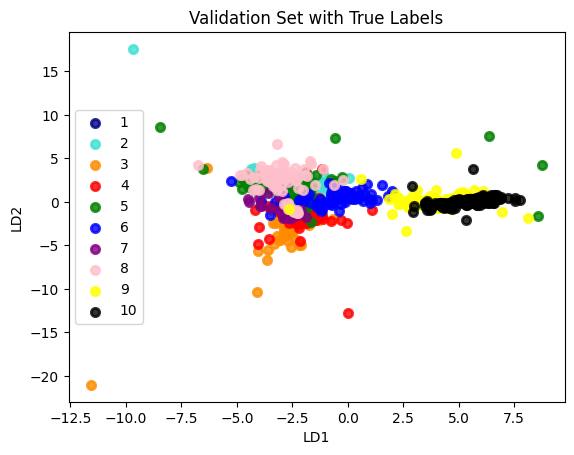

In [45]:
#plot the means of each class in 2d space
plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'purple', 'pink', 'yellow', 'black']
lw = 2

for color, i in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    plt.scatter(val_lda[val_classes.values.ravel() == i, 0], val_lda[val_classes.values.ravel() == i, 1], color=color, alpha=.8, lw=lw,
                label=i + 1)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Validation Set with True Labels')
plt.xlabel('LD1')
plt.ylabel('LD2')


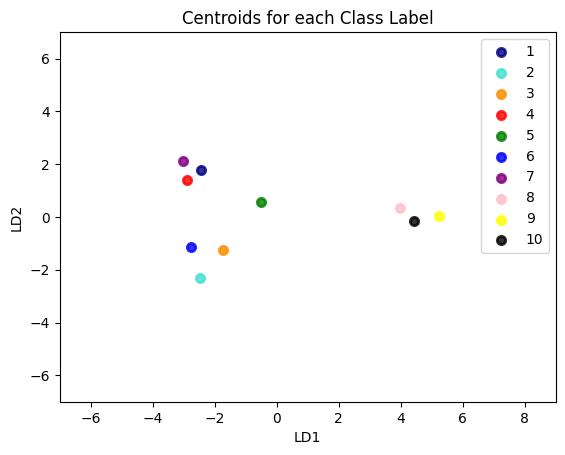

In [82]:
centroids = []
for i in range(0,10):
    points = []
    x_lD = np.mean(train_lda[train_classes.values.ravel() == i+1, 0])
    y_LD = np.mean(train_lda[train_classes.values.ravel() == i+1, 1])
    points.append(x_lD)
    points.append(y_LD)
    centroids.append(points)

# print(centroids)
# print(lda.means_)
#plot each centroid according to the class color it belongs to
for color, i in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    plt.scatter(centroids[i][0], centroids[i][1], color=color, alpha=.8, lw=lw,
                label=i + 1)
plt.title("Centroids for each Class Label")
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlim([-7,9])
plt.ylim([-7,7])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

In [47]:
#Use 1 nearest neighbor classifer to predict labels for validation set
knn = KNeighborsClassifier(n_neighbors=1)

#referenced this to fix errors with column vs 1d array: https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
knn.fit(train_lda, train_classes.values.ravel())
preds = knn.predict(val_lda) #predict validation set

#referenced this for classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
target_names = ["Baked Products", "Vegetables and Vegetable Products", "Soups, Sauces, and Gravies","Sweets","Fast Foods", "Fruits and Fruit Juices", "Breakfast Cereals", "Poultry Products", "Beef Products" , "Lamb, Veal, and Game Products"]
#report classification performance by comparing predictions to the true labels
print(classification_report(val_classes, preds, target_names=target_names) )
print("This shows us the accuracy for each class. Overall, this looks pretty good for a 1 nearest neighbor classification model!")

                                   precision    recall  f1-score   support

                   Baked Products       0.82      0.92      0.86        97
Vegetables and Vegetable Products       0.89      0.89      0.89       169
       Soups, Sauces, and Gravies       0.85      0.74      0.79        70
                           Sweets       0.78      0.63      0.70        71
                       Fast Foods       0.72      0.81      0.76        68
          Fruits and Fruit Juices       0.72      0.78      0.75        50
                Breakfast Cereals       0.86      0.85      0.86        80
                 Poultry Products       0.86      0.87      0.87        71
                    Beef Products       0.96      0.95      0.96       158
    Lamb, Veal, and Game Products       0.85      0.85      0.85        62

                         accuracy                           0.85       896
                        macro avg       0.83      0.83      0.83       896
                     we

What we expect to get: 


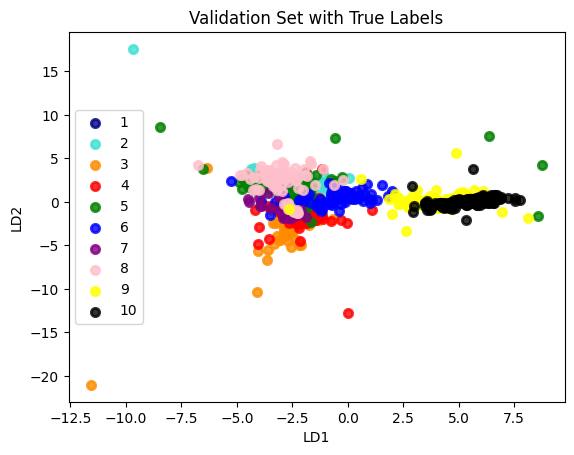

In [48]:
print("What we expect to get: ")
plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'purple', 'pink', 'yellow', 'black']
lw = 2

for color, i in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    plt.scatter(val_lda[val_classes.values.ravel() == i, 0], val_lda[val_classes.values.ravel() == i, 1], color=color, alpha=.8, lw=lw,
                label=i + 1)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Validation Set with True Labels')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()


In [49]:
print(preds.shape)
print(val_lda.shape)

(896,)
(896, 9)


What we got:


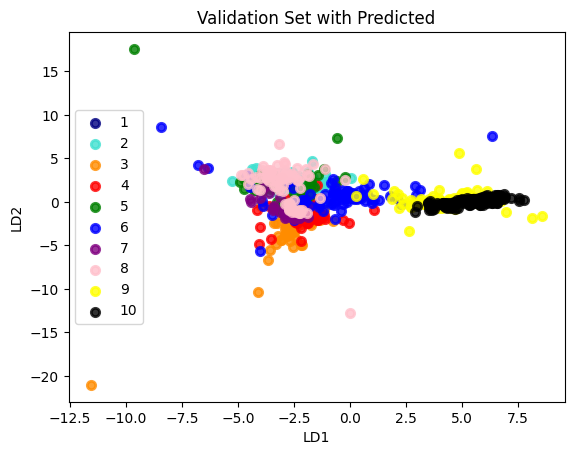

In [50]:
#TODO: plot the validation set with the predicted labels
preds = pd.DataFrame(preds)
print("What we got:")
plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'purple', 'pink', 'yellow', 'black']
lw = 2

for color, i in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    plt.scatter(val_lda[preds.values.ravel() == i, 0], val_lda[preds.values.ravel() == i, 1], color=color, alpha=.8, lw=lw,
                label=i + 1)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Validation Set with Predicted')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()


What we got:


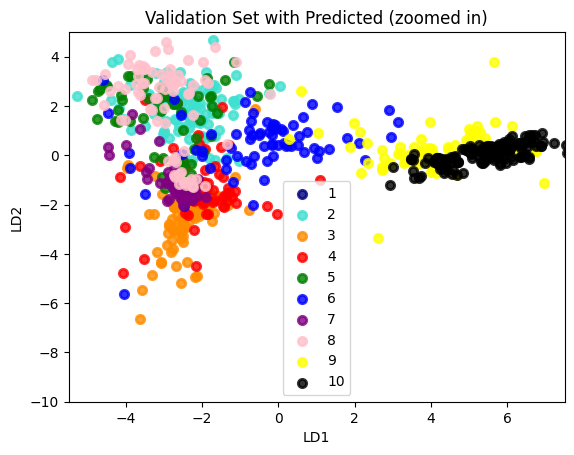

In [51]:
#TODO: plot the validation set with the predicted labels
preds = pd.DataFrame(preds)
print("What we got:")
plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'purple', 'pink', 'yellow', 'black']
lw = 2

for color, i in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    plt.scatter(val_lda[preds.values.ravel() == i, 0], val_lda[preds.values.ravel() == i, 1], color=color, alpha=.8, lw=lw,
                label=i + 1)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Validation Set with Predicted (zoomed in)')
plt.xlim(-5.5, 7.5)
plt.ylim(-10, 5)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()


[[ 89   0   2   4   2   0   0   0   0   0]
 [  0 150   3   1   4   9   2   0   0   0]
 [  3   9  52   1   1   2   2   0   0   0]
 [  6   1   2  45   7   3   5   1   0   1]
 [  6   1   0   3  55   0   0   3   0   0]
 [  0   5   0   3   1  39   2   0   0   0]
 [  5   3   2   1   1   0  68   0   0   0]
 [  0   0   0   0   4   1   0  62   2   2]
 [  0   0   0   0   1   0   0   1 150   6]
 [  0   0   0   0   0   0   0   5   4  53]]
accuracy:  0.8515625


Text(0.5, 1.0, 'Confusion Matrix for Ground Truth vs Predicted Labels')

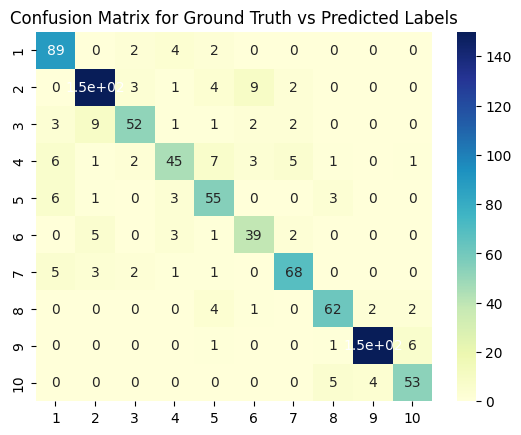

In [52]:
#generate confusion matrix and interpret
x_label = [1,2,3,4,5,6,7,8,9,10]
y_label = [1,2,3,4,5,6,7,8,9,10]
cm = confusion_matrix(val_classes, preds)
print(cm)
#sns version
sns.heatmap(cm, xticklabels=x_label, yticklabels=y_label, annot=True, cmap="YlGnBu")
print("accuracy: ", np.trace(cm)/np.sum(cm))
plt.title("Confusion Matrix for Ground Truth vs Predicted Labels")

#### 20% credit.  Perform cross-validation to find the optimum number of neighbors (k) for the kNN classifier.

For this purpose, merge the training and validation sets ([x1; x2], [c1; c2]), and then re-split them following the original proportions.  For each split, use the training samples to classify the validation samples, and store the classification rate.  Repeat the re-splitting process multiple times and compute the average performance.  Start with k=1 neighbors, and repeat for k=2, 3, …  Discuss your findings.  Does classification performance improve as you increase the number of neighbors?  Are changes in classification performance statistically significant (i.e., as indicated by ANOVA)? Generate a box plot for each value of k you evaluated.

In [53]:
#merging:
train_x1 = pd.read_csv('x1.csv', header=None)
train_x2 = pd.read_csv('x2.csv', header=None)
print("x1 shape: ", train_x1.shape)
print("x2 shape: ", train_x2.shape)

train_c1 = pd.read_csv('c1.csv', header=None)
train_c2 = pd.read_csv('c2.csv', header=None)
print("c1 shape: ", train_c1.shape)
print("c2 shape: ", train_c2.shape)

data_features = pd.concat([train_x1, train_x2])
data_classes = pd.concat([train_c1, train_c2])

print("merged x shape: ",data_features.shape)
print("merged c shape: ",data_classes.shape)



x1 shape:  (898, 46)
x2 shape:  (896, 46)
c1 shape:  (898, 1)
c2 shape:  (896, 1)
merged x shape:  (1794, 46)
merged c shape:  (1794, 1)


In [54]:
#apply LDA to merged data
lda = LDA(n_components = 9)
lda.fit(data_features, data_classes.values.ravel())
data_lda = lda.transform(data_features)
data_lda = pd.DataFrame(data_lda) #convert to dataframe so we can use it
print("The shape of the training/testing X matrix dataset",data_lda.shape)
print("The shape of the training/testing Y matrix dataset",data_classes.shape)
print("THIS IS AFTER APPLYING DIMENSIONALITY REDUCTION!")

The shape of the training/testing X matrix dataset (1794, 9)
The shape of the training/testing Y matrix dataset (1794, 1)
THIS IS AFTER APPLYING DIMENSIONALITY REDUCTION!


In [55]:
rows_in_split = int(data_features.shape[0] / 2)
print("rows in split: ", rows_in_split)

classification_rate = []  # store classification rate for each neighbor
classification_boxplot = []  # store raw data of classification rate for each neighbor
models = []  # store models for each neighbor


for i in range(1, 16, 1):
    # first loop determines the number of neighbors to use, we will test 1-100 neighbors
    iteration_classification_rate = []
    iteration_models = []

    for _ in range(25): 
        train, test, train_labels, test_labels = train_test_split(data_lda, data_classes, test_size=0.5, shuffle=True)

        # K-nearest neighbors with the current number of neighbors (i)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train, train_labels.values.ravel())
        preds = knn.predict(test)

        # Store classification rate for this iteration
        success = np.sum(preds == test_labels.values.ravel()) / len(test_labels)
        iteration_classification_rate.append(success)
        iteration_models.append(knn)

    # Compute the average classification rate for this value of k
    average_classification_rate = np.mean(iteration_classification_rate)
    classification_rate.append(average_classification_rate)
    classification_boxplot.append(iteration_classification_rate)
    models.append(iteration_models)

# Now classification_rate contains the average performance for each value of k


rows in split:  897


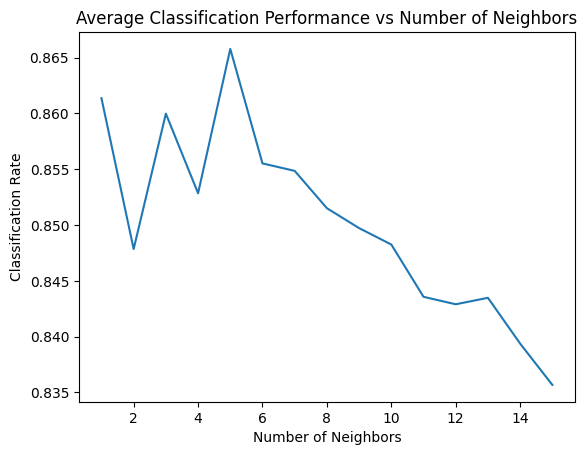

The best number of neighbors is  5  with an average classification rate of  0.8657748049052397


In [56]:
#plot classification rate vs number of neighbors
#classification rate is a np array

plt.plot(range(1, 16), classification_rate) 
plt.title("Average Classification Performance vs Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Classification Rate")
plt.show()

print("The best number of neighbors is ", np.argmax(classification_rate) + 1, " with an average classification rate of ", np.max(classification_rate))


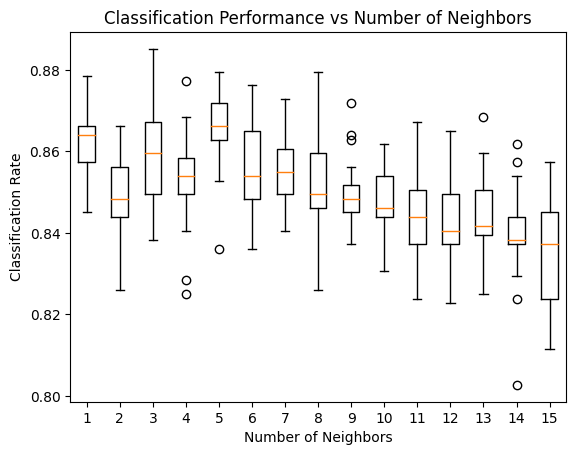

In [57]:
#generate box plot for each value of k evaluated
#referenced this for boxplot: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

plt.boxplot(classification_boxplot)
plt.title("Classification Performance vs Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Classification Rate")
plt.show()

In [58]:
classification_rate = pd.DataFrame(classification_rate)
classification_rate.columns = ['Average Classification Rate for All Neighbors']
classification_rate.describe()

,Average Classification Rate for All Neighbors
count,15.000000
mean,0.850176
std,0.008458
min,0.835674
25%,0.843523
50%,0.849721
75%,0.855184
max,0.865775


In [59]:
#make the rows into columns so we can describe the data
#dimensions need to be 25 x 15, so we transpose the data to make it 15 x 25
# print(classification_boxplot)
classification_boxplot_def = pd.DataFrame(classification_boxplot)
classification_boxplot_def = classification_boxplot_def.transpose()

classification_boxplot_def.columns = [*range(1, 16, 1)]
classification_boxplot_def.describe()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.861360,0.847848,0.859978,0.852843,0.865775,0.855518,0.854849,0.851505,0.849721,0.848250,0.843567,0.842899,0.843478,0.839376,0.835674
std,0.008958,0.011711,0.012080,0.011532,0.009311,0.010586,0.009011,0.011222,0.007987,0.008733,0.009829,0.010463,0.010308,0.011576,0.012744
min,0.845039,0.826087,0.838350,0.824972,0.836120,0.836120,0.840580,0.826087,0.837235,0.830546,0.823857,0.822742,0.824972,0.802676,0.811594
25%,0.857302,0.843924,0.849498,0.849498,0.862876,0.848384,0.849498,0.846154,0.845039,0.843924,0.837235,0.837235,0.839465,0.837235,0.823857
50%,0.863991,0.848384,0.859532,0.853958,0.866221,0.853958,0.855072,0.849498,0.848384,0.846154,0.843924,0.840580,0.841695,0.838350,0.837235
75%,0.866221,0.856187,0.867336,0.858417,0.871795,0.865106,0.860647,0.859532,0.851728,0.853958,0.850613,0.849498,0.850613,0.843924,0.845039
max,0.878484,0.866221,0.885173,0.877369,0.879599,0.876254,0.872910,0.879599,0.871795,0.861761,0.867336,0.865106,0.868450,0.861761,0.857302


In [85]:
#use anova to determine if there is a significant difference between the classification performances for each value of k
#referenced this for anova: https://medium.com/@ginoasuncion/visualizing-statistical-significance-together-with-a-box-plot-f7485499535
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(classification_boxplot_def[1], classification_boxplot_def[2], classification_boxplot_def[3], classification_boxplot_def[4], classification_boxplot_def[5], classification_boxplot_def[6], classification_boxplot_def[7], classification_boxplot_def[8], classification_boxplot_def[9], classification_boxplot_def[10], classification_boxplot_def[11], classification_boxplot_def[12], classification_boxplot_def[13], classification_boxplot_def[14], classification_boxplot_def[15])

print("The p value is ", pvalue)

if pvalue < 0.05:
    print("There is significant difference between classification performances of the k values")
else:
    print("There is not a significant difference between classification performances of the k values")

#display 

The p value is  9.797335791350685e-31
There is significant difference between classification performances of the k values


In [90]:
fvalue, pvalue = stats.f_oneway(classification_boxplot_def[1], classification_boxplot_def[2])

In [93]:
#anova heatmap
#create dataframe comparing anova for each k value, should be 15 x 15
anova = []
for i in range(1, 16):
    row = []
    for j in range(1, 16):
        fvalue, pvalue = stats.f_oneway(classification_boxplot_def[i], classification_boxplot_def[j])
        row.append(pvalue)
    anova.append(row)
    
anova = pd.DataFrame(anova)
# anova.columns = [*range(0, 16, 1)]


              0             1             2         3             4   \
0   1.000000e+00  3.292642e-05  6.478874e-01  0.005371  9.402225e-02   
1   3.292642e-05  1.000000e+00  7.414794e-04  0.135220  2.586940e-07   
2   6.478874e-01  7.414794e-04  1.000000e+00  0.037798  6.338737e-02   
3   5.370760e-03  1.352195e-01  3.779837e-02  1.000000  6.786619e-05   
4   9.402225e-02  2.586940e-07  6.338737e-02  0.000068  1.000000e+00   
5   4.044130e-02  1.891824e-02  1.715035e-01  0.397016  6.710386e-04   
6   1.360413e-02  2.190542e-02  9.534342e-02  0.496276  1.093074e-04   
7   1.243972e-03  2.652544e-01  1.335409e-02  0.679488  1.159455e-05   
8   1.347419e-05  5.120105e-01  8.978572e-04  0.271418  3.691982e-08   
9   3.546915e-06  8.913151e-01  2.684775e-04  0.118938  1.186737e-08   
10  2.200899e-08  1.679310e-01  3.210090e-06  0.003609  1.093892e-10   
11  2.109166e-08  1.215911e-01  2.478883e-06  0.002485  1.233553e-10   
12  3.646601e-08  1.677773e-01  4.138726e-06  0.003963  2.013663

<Axes: >

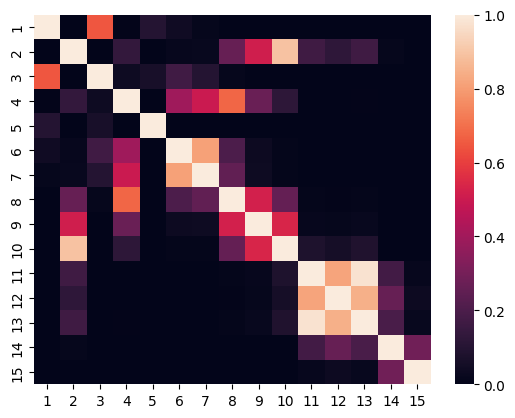

In [94]:
labels = [*range(1, 16, 1)]
sns.heatmap(anova,
            xticklabels=labels,
            yticklabels=labels)

#### 10% credit. Repeat part a. using a different classifier from those discussed in lecture 8, e.g., nearest mean classifier, quadratic classifier.
You may incorporate prior probabilities to improve performance.  NOTE: depending on the data split, the covariance matrix of each class may be ill-conditioned, so you may need to use a diagonal matrix (i.e., which assumes features are uncorrelated).  Is this assumption valid?

In [61]:
#read in the original dataset
#read in training data
train_features = pd.read_csv('x1.csv', header=None)
train_classes = pd.read_csv('c1.csv', header=None)

#read in validation set
val_features = pd.read_csv('x2.csv', header=None)
val_classes = pd.read_csv('c2.csv', header=None)

#read in test set, classes are not provided
test_features = pd.read_csv('x3.csv', header=None)

#perform LDA on training data
lda = LDA(n_components = 9)
lda.fit(train_features, train_classes.values.ravel())
train_lda = lda.transform(train_features)

#perform LDA on validation data
val_lda = lda.transform(val_features)

#perform LDA on test data
test_lda = lda.transform(test_features)


correlation for val


Text(0.5, 1.0, 'Correlation matrix for Validation Set')

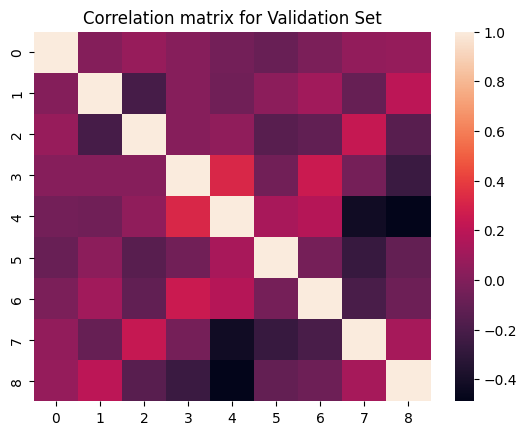

In [62]:
print("correlation for val")
corr = pd.DataFrame(val_lda).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title("Correlation matrix for Validation Set")

Text(0.5, 1.0, 'Covariance matrix for Validation Set')

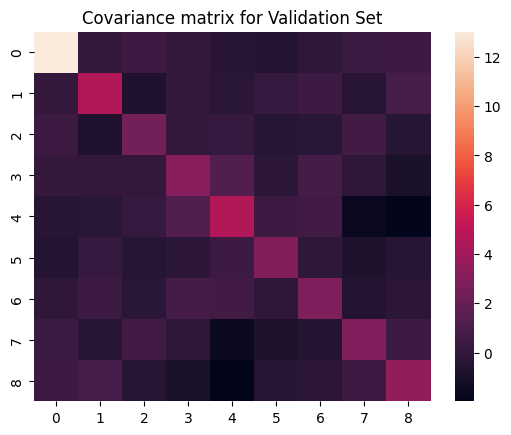

In [63]:
#covariance matrix for validation set
cov = pd.DataFrame(val_lda).cov()
sns.heatmap(cov, 
            xticklabels=cov.columns.values,
            yticklabels=cov.columns.values)
plt.title("Covariance matrix for Validation Set")

#### NOTE from before: might need to use diagonal matrix, as we need to assume features are independent.
When I plotted the correlation matrix of the initial data following LDA transformation, I noticed that though the correlation matrix of the training set was uncorrelated following transformation, the validation set had some correlations between features. This makes sense, because we didn't use validation to do LDA reduction, but even so, I don't think we should assume that the features are independent. Thus, I will not use the diagonal matrix, as this assumes that the features are independent, and logically, it makes sense that some features may be correlated as it makes sense to have colinearity for some nutritional features.


In [64]:
#using nearest mean classifier
#referencing https://www.geeksforgeeks.org/ml-nearest-centroid-classifier/
from sklearn.neighbors import NearestCentroid

#making the model
model = NearestCentroid()
model.fit(train_lda, train_classes.values.ravel())

#classification report
predicted = model.predict(val_lda)
print(classification_report(val_classes, predicted, target_names=target_names) )

                                   precision    recall  f1-score   support

                   Baked Products       0.73      0.81      0.77        97
Vegetables and Vegetable Products       0.92      0.64      0.76       169
       Soups, Sauces, and Gravies       0.82      0.60      0.69        70
                           Sweets       0.63      0.61      0.62        71
                       Fast Foods       0.88      0.78      0.83        68
          Fruits and Fruit Juices       0.32      0.92      0.47        50
                Breakfast Cereals       0.96      0.66      0.79        80
                 Poultry Products       0.86      0.86      0.86        71
                    Beef Products       0.90      0.93      0.91       158
    Lamb, Veal, and Game Products       0.84      0.77      0.81        62

                         accuracy                           0.76       896
                        macro avg       0.79      0.76      0.75       896
                     we

[[ 79   0   3  12   2   0   1   0   0   0]
 [  0 108   5   1   2  53   0   0   0   0]
 [  4   7  42   2   0  15   0   0   0   0]
 [  9   1   0  43   1  13   1   0   3   0]
 [  7   0   1   3  53   3   0   1   0   0]
 [  0   1   0   3   0  46   0   0   0   0]
 [  9   0   0   4   0  14  53   0   0   0]
 [  0   0   0   0   1   1   0  61   4   4]
 [  0   0   0   0   0   0   0   6 147   5]
 [  0   0   0   0   1   0   0   3  10  48]]
accuracy 0.7589285714285714


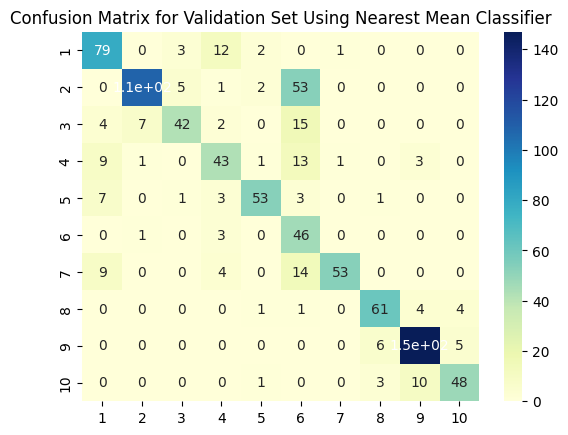

In [65]:
#TODO: generate confusion matrix

cfm = confusion_matrix(val_classes, predicted)
print(cfm)
sns.heatmap(cfm,xticklabels=x_label,yticklabels=y_label, annot=True, cmap="YlGnBu")
plt.title("Confusion Matrix for Validation Set Using Nearest Mean Classifier")
print("accuracy",np.trace(cfm)/np.sum(cfm))

#### 5% extra credit.  Write a Jupyter notebook that reads a test dataset (x3.csv) and generates predictions (c3_pred.csv).

In this case, you will not be able to evaluate the performance of this classifier since the test labels (c3.csv) are not available to you.  Instead, we will compare your predictions against the correct class labels (which we have kept aside).  NOTE: to receive extra credit, we will need to run your code and generate the predictions file (c3_pred.csv) ourselves. In other words, you will not receive extra credits if you only submit the file c3_pred.csv. 

In [66]:
#I will use the best model from the previous part to make predictions for the test set
#knn appeared to have better performance than nearest mean classifier, so I'll use this instead
k_best = np.argmax(classification_rate) + 1

print("The best model is the one with ", k_best, " neighbors with an average classification success rate of ", np.max(classification_rate), " for the validation set.")
#get best model
model = models[k_best - 1][np.argmax(classification_boxplot[k_best-1])] #get the best model from the list of models, the index takes the best model based on the raw data and performance
print("Our best model with ", k_best, " neighbors has a classification success rate of ", classification_boxplot[k_best-1][np.argmax(classification_boxplot[k_best-1])], " for the validation set.")
preds_c3 = model.predict(test_lda)

#output to csvfile
import os
if os.path.exists("c3_pred.csv"):
    os.remove("c3_pred.csv")

preds_c3 = pd.DataFrame(preds_c3)
preds_c3.to_csv('c3_pred.csv', index=False, header=False)

The best model is the one with  5  neighbors with an average classification success rate of  0.8657748049052397  for the validation set.
Our best model with  5  neighbors has a classification success rate of  0.8795986622073578  for the validation set.


  Note that scikit-learn uses the term “Linear Discriminant Analysis” to refer to both (1) the dimensionality reduction technique in Lecture 7 and (2) the Quadratic classifiers in Lecture 8.  As you will recall, when you assume classes have equal covariance matrices (Σ_i=Σ)  the decision boundaries become linear. In this case, the dimensionality reduction technique and the linear classifier are equivalent, except the former generates projections and the latter generates class labels. 